In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

If the below cell gives error in `tz_localize`, use `tz_convert` as Pandas is time zone aware. 

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
strava.head()
#strava

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()
#cheetah

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and we won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [4]:
#Inner Join strava and cheetah
strava_n_cheetah = strava.join(cheetah, how="inner")
strava_n_cheetah

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.000000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-27 21:47:24+00:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


## Required Analysis

1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides

In [5]:
#Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
strava_n_cheetah = strava_n_cheetah.drop(strava_n_cheetah.index[strava_n_cheetah.device_watts == False])

#create SC_date(formate yyyy-mm-dd) from index of strava_n_cheetah
strava_n_cheetah['Date'] = strava_n_cheetah.index
strava_n_cheetah['SC_Date'] = strava_n_cheetah['Date'].dt.date
strava_n_cheetah['SC_Date'] = pd.to_datetime(strava_n_cheetah.SC_Date, format='%Y-%m-%d')

#drop temp column 'Date'
drop_cols = ['Date']
strava_n_cheetah.drop(drop_cols, axis = 1, inplace = True)

strava_n_cheetah.dtypes

average_heartrate             float64
average_temp                  float64
average_watts                 float64
device_watts                   object
distance                      float64
                            ...      
HRV Recovery Points             int64
NP                            float64
IF                            float64
TSS                           float64
SC_Date                datetime64[ns]
Length: 373, dtype: object

In [6]:
# data frame 'strava_n_cheetah' after removing device_watts is False
strava_n_cheetah

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS,SC_Date
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,222.856,0.831550,20.2257,2018-01-27
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,245.365,0.915540,94.5787,2018-01-27
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,253.702,0.946650,98.3269,2018-02-05
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,232.644,0.868080,171.0780,2018-02-07
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,212.726,0.793750,147.7970,2018-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,222.988,0.832045,159.3630,2019-07-19
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,236.028,0.880701,183.1140,2019-07-26
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,212.020,0.791118,51.1646,2019-07-27
2019-07-27 21:47:24+00:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,267.699,0.998877,83.5620,2019-07-27


In [12]:
#Select only interesting columns from strava_n_cheetah to create a samller data fram 'strava_cheetah'
cols = ['SC_Date','elapsed_time', 'Duration', 'moving_time', 'Time Moving', 'Elevation Gain', 'Average Speed',
         'average_watts', 'Average Power', 'Nonzero Average Power', 'NP', 'average_heartrate', 'Average Heart Rate',
         'Average Cadence','average_temp', 'Average Temp', 'VAM', 'Calories (HR)', '1 sec Peak Power', '1 min Peak Hr',
         'TSS', 'device_watts', 'distance', 'kudos', 'workout_type','elevation_gain']

strava_cheetah = strava_n_cheetah[cols]

strava_cheetah

,SC_Date,elapsed_time,Duration,moving_time,Time Moving,Elevation Gain,Average Speed,average_watts,Average Power,Nonzero Average Power,...,VAM,Calories (HR),1 sec Peak Power,1 min Peak Hr,TSS,device_watts,distance,kudos,workout_type,elevation_gain
2018-01-27 19:39:49+00:00,2018-01-27,17,1053,17,1053,77.80,26.0234,153.4,153.283,191.923,...,265.983,201.970,664,143.000,20.2257,True,7.6,4,Ride,95.00 m
2018-01-27 20:01:32+00:00,2018-01-27,67,4062,67,4062,362.20,34.4380,187.7,186.599,231.369,...,321.004,1044.550,766,166.233,94.5787,True,38.6,19,Race,449.00 m
2018-02-05 21:06:42+00:00,2018-02-05,69,4151,65,3945,355.80,22.2417,165.9,163.264,225.094,...,308.571,743.167,846,161.117,98.3269,True,24.3,6,Ride,439.00 m
2018-02-07 06:59:05+00:00,2018-02-07,144,8659,134,8159,815.40,20.7841,151.0,148.253,204.398,...,339.005,1655.090,786,206.826,171.0780,True,47.1,10,Ride,890.00 m
2018-02-09 19:18:03+00:00,2018-02-09,193,11637,139,8415,513.20,25.6585,145.9,143.918,189.786,...,158.763,1659.260,784,164.617,147.7970,True,59.8,22,Ride,656.00 m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,2019-07-19,174,10472,136,8229,500.40,25.4524,166.8,164.740,206.130,...,172.024,0.000,659,0.000,159.3630,True,58.2,16,Ride,666.00 m
2019-07-26 20:12:56+00:00,2019-07-26,185,11150,139,8410,482.63,25.5036,166.9,163.695,201.309,...,155.827,1613.940,894,162.817,183.1140,True,59.6,15,Ride,663.00 m
2019-07-27 20:42:59+00:00,2019-07-27,49,2977,47,2931,157.88,24.3316,168.4,162.109,211.475,...,190.920,573.058,703,138.783,51.1646,True,19.8,6,Ride,247.00 m
2019-07-27 21:47:24+00:00,2019-07-27,50,3015,50,3015,292.20,34.8044,235.2,235.153,262.684,...,348.896,761.681,755,164.567,83.5620,True,29.1,15,Race,415.00 m


In [110]:
#Check data type
#strava_cheetah.dtypes

In [136]:
#Check df descriptive statistics
strava_cheetah.describe()

,elapsed_time,Duration,moving_time,Time Moving,Elevation Gain,Average Speed,average_watts,Average Power,Nonzero Average Power,NP,...,average_temp,Average Temp,VAM,Calories (HR),1 sec Peak Power,1 min Peak Hr,TSS,distance,kudos,elevation_f
count,209.000000,209.00000,209.000000,209.000000,209.000000,209.000000,205.000000,209.000000,209.000000,209.000000,...,164.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,100.464115,6055.62201,83.358852,5063.555024,271.750354,25.309976,167.632195,162.383096,198.173507,218.856761,...,14.140244,-43.410473,158.569869,906.475340,675.435407,140.815400,98.613710,34.970335,11.435407,354.626794
std,71.751306,4307.06385,51.700882,3137.361310,259.255156,5.490994,32.632763,39.941909,41.419385,42.772542,...,5.853935,111.222057,115.517437,650.464279,176.204609,50.948404,69.880212,21.457247,5.541529,319.208553
min,13.000000,799.00000,10.000000,648.000000,0.000000,3.672330,103.700000,0.000000,0.000000,0.000000,...,0.000000,-255.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,48.000000,2933.00000,46.000000,2771.000000,28.800000,22.820900,143.000000,138.964000,178.926000,204.843000,...,10.000000,4.961980,38.251200,341.043000,572.000000,141.633000,40.278800,19.800000,7.000000,49.000000
50%,66.000000,4017.00000,64.000000,3921.000000,218.000000,25.008500,163.700000,161.107000,198.435000,222.988000,...,15.000000,12.695800,149.974000,810.052000,703.000000,160.383000,81.824300,31.700000,11.000000,304.000000
75%,184.000000,11077.00000,136.000000,8229.000000,443.600000,26.683800,189.600000,187.934000,215.037000,240.085000,...,19.000000,17.995300,247.593000,1479.030000,799.000000,166.600000,156.629000,57.800000,16.000000,593.000000
max,260.000000,15634.00000,236.000000,14217.000000,1286.800000,38.350200,266.600000,266.216000,291.547000,302.396000,...,31.000000,31.233000,388.768000,3258.050000,1082.000000,227.217000,412.071000,108.200000,24.000000,1474.000000


### Question 1:
Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 

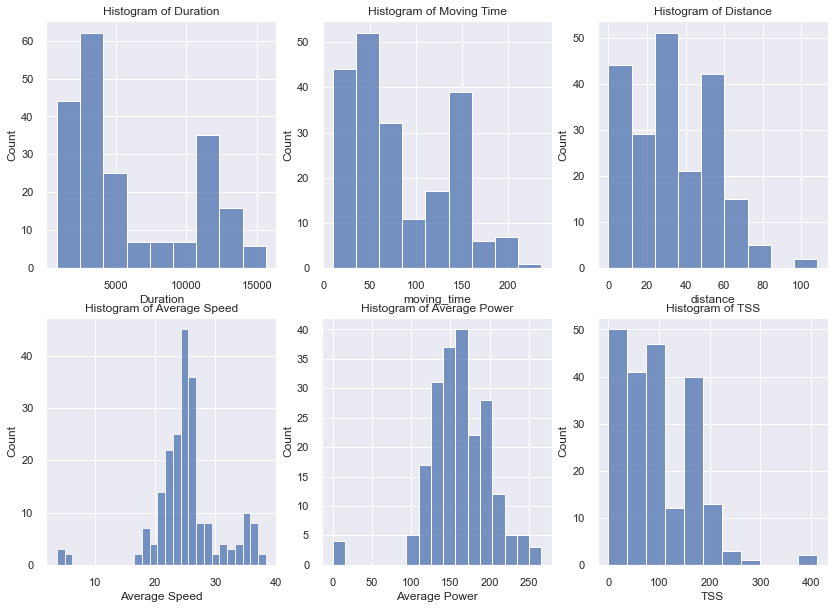

In [8]:
#explore the distributions of some key variables: time, distance, average speed, average power, TSS.
#plot multiple graphs 
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
f, axes = plt.subplots(2, 3, figsize = (14, 10))
sns.histplot(strava_cheetah['Duration'], ax=axes[0][0]).set_title('Histogram of Duration')
sns.histplot(strava_cheetah['moving_time'], ax=axes[0][1]).set_title('Histogram of Moving Time')
sns.histplot(strava_cheetah['distance'], ax=axes[0][2]).set_title('Histogram of Distance')
sns.histplot(strava_cheetah['Average Speed'], ax=axes[1][0]).set_title('Histogram of Average Speed')
sns.histplot(strava_cheetah['Average Power'], ax=axes[1][1]).set_title('Histogram of Average Power')
sns.histplot(strava_cheetah['TSS'], ax=axes[1][2]).set_title('Histogram of TSS')
plt.show()

### Analysis 1:

The histrograms above show that:


* The distribution of average power is normally distributed.

* The distribution of duration (overall duration of the ride), moving time, distance and TSS (Training Stress Score) are right-skewed distributed

* The distribution of average speed is left-skewed distributed.


In [13]:
#Convert elevation_gain type from obj. to float for further calculation 

strava_cheetah['ele_gain1']=strava_cheetah['elevation_gain'].astype(str)
strava_cheetah['ele_gain2'] = strava_cheetah['ele_gain1'].str[:4]
strava_cheetah['elevation_f'] = strava_cheetah['ele_gain2'].astype(float)

drop_cols = ['elevation_gain', 'ele_gain1', 'ele_gain2']
strava_cheetah.drop(drop_cols, axis = 1, inplace = True)
strava_cheetah

<ipython-input-13-60b4b4fab2bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strava_cheetah['ele_gain1']=strava_cheetah['elevation_gain'].astype(str)
<ipython-input-13-60b4b4fab2bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strava_cheetah['ele_gain2'] = strava_cheetah['ele_gain1'].str[:4]
<ipython-input-13-60b4b4fab2bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,SC_Date,elapsed_time,Duration,moving_time,Time Moving,Elevation Gain,Average Speed,average_watts,Average Power,Nonzero Average Power,...,VAM,Calories (HR),1 sec Peak Power,1 min Peak Hr,TSS,device_watts,distance,kudos,workout_type,elevation_f
2018-01-27 19:39:49+00:00,2018-01-27,17,1053,17,1053,77.80,26.0234,153.4,153.283,191.923,...,265.983,201.970,664,143.000,20.2257,True,7.6,4,Ride,95.0
2018-01-27 20:01:32+00:00,2018-01-27,67,4062,67,4062,362.20,34.4380,187.7,186.599,231.369,...,321.004,1044.550,766,166.233,94.5787,True,38.6,19,Race,449.0
2018-02-05 21:06:42+00:00,2018-02-05,69,4151,65,3945,355.80,22.2417,165.9,163.264,225.094,...,308.571,743.167,846,161.117,98.3269,True,24.3,6,Ride,439.0
2018-02-07 06:59:05+00:00,2018-02-07,144,8659,134,8159,815.40,20.7841,151.0,148.253,204.398,...,339.005,1655.090,786,206.826,171.0780,True,47.1,10,Ride,890.0
2018-02-09 19:18:03+00:00,2018-02-09,193,11637,139,8415,513.20,25.6585,145.9,143.918,189.786,...,158.763,1659.260,784,164.617,147.7970,True,59.8,22,Ride,656.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,2019-07-19,174,10472,136,8229,500.40,25.4524,166.8,164.740,206.130,...,172.024,0.000,659,0.000,159.3630,True,58.2,16,Ride,666.0
2019-07-26 20:12:56+00:00,2019-07-26,185,11150,139,8410,482.63,25.5036,166.9,163.695,201.309,...,155.827,1613.940,894,162.817,183.1140,True,59.6,15,Ride,663.0
2019-07-27 20:42:59+00:00,2019-07-27,49,2977,47,2931,157.88,24.3316,168.4,162.109,211.475,...,190.920,573.058,703,138.783,51.1646,True,19.8,6,Ride,247.0
2019-07-27 21:47:24+00:00,2019-07-27,50,3015,50,3015,292.20,34.8044,235.2,235.153,262.684,...,348.896,761.681,755,164.567,83.5620,True,29.1,15,Race,415.0


In [14]:
#Check correlation (Note: value of 1 (or -1) The closer to 1 the better the relationship.)
SC_corr=strava_cheetah.corr()
SC_corr


,elapsed_time,Duration,moving_time,Time Moving,Elevation Gain,Average Speed,average_watts,Average Power,Nonzero Average Power,NP,...,average_temp,Average Temp,VAM,Calories (HR),1 sec Peak Power,1 min Peak Hr,TSS,distance,kudos,elevation_f
elapsed_time,1.000000,0.999989,0.975316,0.976818,0.762381,-0.152636,-0.161617,-0.174337,-0.008717,0.005559,...,0.085515,0.288609,0.034819,0.766920,0.319016,0.108769,0.825980,0.896884,0.658846,0.800025
Duration,0.999989,1.000000,0.975361,0.976865,0.763200,-0.152924,-0.162313,-0.174981,-0.008335,0.005575,...,0.085673,0.290633,0.036477,0.766704,0.319035,0.108395,0.826206,0.896911,0.659296,0.800891
moving_time,0.975316,0.975361,1.000000,0.999684,0.813146,-0.103484,-0.112507,-0.109838,0.032234,0.044431,...,0.104961,0.264257,0.072556,0.825105,0.324501,0.156672,0.871368,0.939383,0.663127,0.838810
Time Moving,0.976818,0.976865,0.999684,1.000000,0.811409,-0.112951,-0.114384,-0.119617,0.022682,0.034142,...,0.105178,0.260278,0.072869,0.819287,0.317647,0.149319,0.866093,0.933596,0.659831,0.836633
Elevation Gain,0.762381,0.763200,0.813146,0.811409,1.000000,-0.016160,-0.100030,-0.035987,0.280505,0.229933,...,0.131924,0.531764,0.556451,0.744963,0.383853,0.141130,0.828928,0.805468,0.637602,0.991224
Average Speed,-0.152636,-0.152924,-0.103484,-0.112951,-0.016160,1.000000,0.720608,0.814403,0.706251,0.674857,...,-0.213256,0.074689,0.141106,0.128207,0.491794,0.330653,0.134054,0.187363,0.393050,0.011840
average_watts,-0.161617,-0.162313,-0.112507,-0.114384,-0.100030,0.720608,1.000000,0.997742,0.759690,0.772574,...,-0.275660,-0.211259,-0.026823,0.054222,0.274969,0.301406,0.150163,0.031858,0.245937,-0.096081
Average Power,-0.174337,-0.174981,-0.109838,-0.119617,-0.035987,0.814403,0.997742,1.000000,0.834029,0.844487,...,-0.273784,-0.042234,0.058553,0.139480,0.495992,0.380530,0.225290,0.129199,0.264819,-0.026603
Nonzero Average Power,-0.008717,-0.008335,0.032234,0.022682,0.280505,0.706251,0.759690,0.834029,1.000000,0.940272,...,-0.151956,0.365251,0.462445,0.253779,0.645531,0.312368,0.398621,0.258145,0.410967,0.294469
NP,0.005559,0.005575,0.044431,0.034142,0.229933,0.674857,0.772574,0.844487,0.940272,1.000000,...,-0.198613,0.260784,0.331426,0.265496,0.729553,0.345950,0.432286,0.270703,0.353419,0.240465


In [15]:
#Select only interesting columns from strava_cheetah to create a samller data fram 'result'
#Distance, Moving Time, Average Speed, Heart Rate, Power (watts), Normalised power (NP), 
#TSS (Training Stress Score), Elevation Gain(metres climbed over the ride)

cols = ['SC_Date', 'distance', 'Time Moving', 'Average Speed', 'Average Heart Rate', 
        'average_watts', 'NP', 'TSS', 'elevation_f']
result = strava_cheetah[cols]

#Check correlation
result_corr=result.corr()
result_corr

,distance,Time Moving,Average Speed,Average Heart Rate,average_watts,NP,TSS,elevation_f
distance,1.000000,0.933596,0.187363,0.175241,0.031858,0.270703,0.922565,0.839543
Time Moving,0.933596,1.000000,-0.112951,0.039877,-0.114384,0.034142,0.866093,0.836633
Average Speed,0.187363,-0.112951,1.000000,0.422165,0.720608,0.674857,0.134054,0.011840
Average Heart Rate,0.175241,0.039877,0.422165,1.000000,0.404066,0.343179,0.183747,0.050808
average_watts,0.031858,-0.114384,0.720608,0.404066,1.000000,0.772574,0.150163,-0.096081
NP,0.270703,0.034142,0.674857,0.343179,0.772574,1.000000,0.432286,0.240465
TSS,0.922565,0.866093,0.134054,0.183747,0.150163,0.432286,1.000000,0.847247
elevation_f,0.839543,0.836633,0.011840,0.050808,-0.096081,0.240465,0.847247,1.000000


### Question 2:
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain

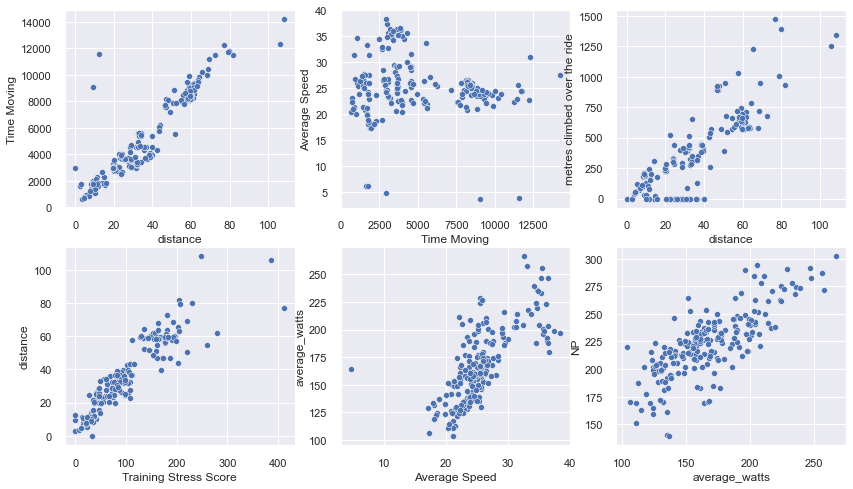

In [16]:
#scatterplot - positive correlation

f, axes = plt.subplots(2, 3, figsize = (14, 8))
f1 = sns.scatterplot(x='distance', y = 'Time Moving', data = strava_cheetah, ax=axes[0][0])

f2 = sns.scatterplot(x='Time Moving', y = 'Average Speed', data = strava_cheetah, ax=axes[0][1])

f3 = sns.scatterplot(x='distance', y = 'elevation_f', data = strava_cheetah, ax=axes[0][2])
f3.set(ylabel='metres climbed over the ride')

f4=sns.scatterplot(x='TSS', y = 'distance', data = strava_cheetah, ax=axes[1][0])
f4.set(xlabel='Training Stress Score')

f5 = sns.scatterplot(x='Average Speed', y = 'average_watts', data = strava_cheetah, ax=axes[1][1])
f6 = sns.scatterplot(x='average_watts', y = 'NP', data = strava_cheetah, ax=axes[1][2])

[Text(0.5, 0, 'metres climbed over the ride')]

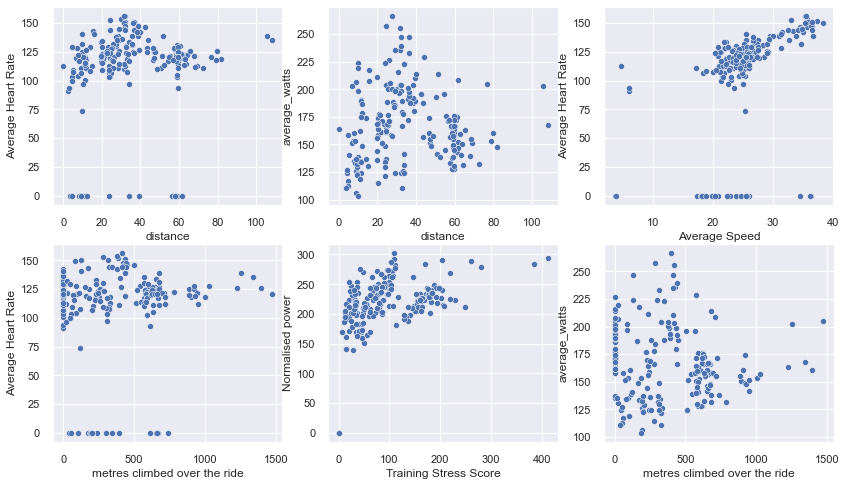

In [17]:
#scatterplot - weak/no correlation

f, axes = plt.subplots(2, 3, figsize = (14, 8))
g1 = sns.scatterplot(x='distance', y = 'Average Heart Rate', data = strava_cheetah, ax=axes[0][0])

g2 = sns.scatterplot(x='distance', y = 'average_watts', data = strava_cheetah, ax=axes[0][1])

g3 = sns.scatterplot(x='Average Speed', y = 'Average Heart Rate', data = strava_cheetah, ax=axes[0][2])

g4 = sns.scatterplot(x='elevation_f', y = 'Average Heart Rate', data = strava_cheetah, ax=axes[1][0])
g4.set(xlabel='metres climbed over the ride')

g5=sns.scatterplot(x='TSS', y = 'NP', data = strava_cheetah, ax=axes[1][1])
g5.set(xlabel='Training Stress Score', ylabel = 'Normalised power')
g6=sns.scatterplot(x='elevation_f', y = 'average_watts', data = strava_cheetah, ax=axes[1][2])
g6.set(xlabel='metres climbed over the ride')

### Analysis 2:

The scatterplots above show that:

* There are positive relationships between:
    * distance and moving time (corr = 0.933596)
    * TSS and moving time (corr = 0.922565)
    * distance and elevation gain (corr = 0.839543)
    * TSS and distance (corr = 0.922565)
    * average speed and average watts (corr = 0.720608)
    * average_watts and NP (corr = 0.772574)
    
* There are weak or no relationship between:
    * distance and average heart rate (corr = 0.175241)
    * average speed and average heart rate (corr = 0.422165)
    * elevation gain and average heart rate  (corr = 0.050808)
    * TSS and NP  (corr = 0.432286)
    * distance and average watts  (corr = 0.031858
    * elevation gain and average watts  (corr = -0.096081)

### Question 3: 
* We want to explore the differences between the three categories: `Race`, `Workout` and `Ride`.

#### Question 3A: 
Use scatter plots with different colours for each category to explore how these categories differ.  
    
#### Question 3B: 
Use histograms or box plots to visualise the different distributions of a variable for the three categories.
 

* In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).

Text(0.5, 1.0, 'D. Normalised power:NP vs Average Power(watts) ')

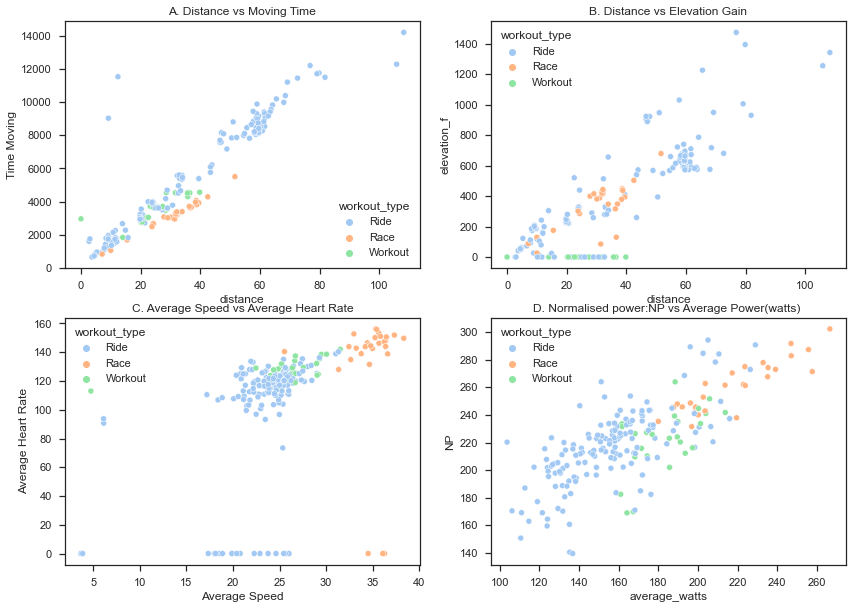

In [52]:
#Use scatter plots with different colours for each category to explore how these categories differ.

#separate into 3 graphs
#sns.relplot(x='distance', y = 'Time Moving',  col='workout_type', data = strava_cheetah)

f, axes = plt.subplots(2,2, figsize = (14, 10))
sns.scatterplot(x='distance', y = 'Time Moving', hue='workout_type', data = strava_cheetah, ax=axes[0][0]).set_title('A. Distance vs Moving Time')
sns.scatterplot(x='distance', y = 'elevation_f', hue='workout_type', data = strava_cheetah, ax=axes[0][1]).set_title('B. Distance vs Elevation Gain')
sns.scatterplot(x='Average Speed', y = 'Average Heart Rate', hue='workout_type', data = strava_cheetah, ax=axes[1][0]).set_title('C. Average Speed vs Average Heart Rate')
sns.scatterplot(x='average_watts', y = 'NP', hue='workout_type', data = strava_cheetah, ax=axes[1][1]).set_title('D. Normalised power:NP vs Average Power(watts) ')


#### Analysis 3A: 

From the scatterplots above:

* A. Distance vs Moving Time :It can be seen that categories Ride has significant higher distance and moving time compare to other categories. Race and Workout have a similar trend.

* B. Distance vs Elevation Gain : People who ride has more distance and elevation gain than other categories. However, people who workout has zero elevation gain.

* C. Average Speed vs Average Heart Rate: The illustration shows that the Race categorie has the highest average speed and heart rate follow by Workout and Ride categories respectively. Average Heart rate of all are between 90-160.

* D. Normalised power:NP vs Average Power(watts) : The average watts and NP of Race categorie is the hightest among others.

Text(0.5, 1.0, 'TSS vs Workout type')

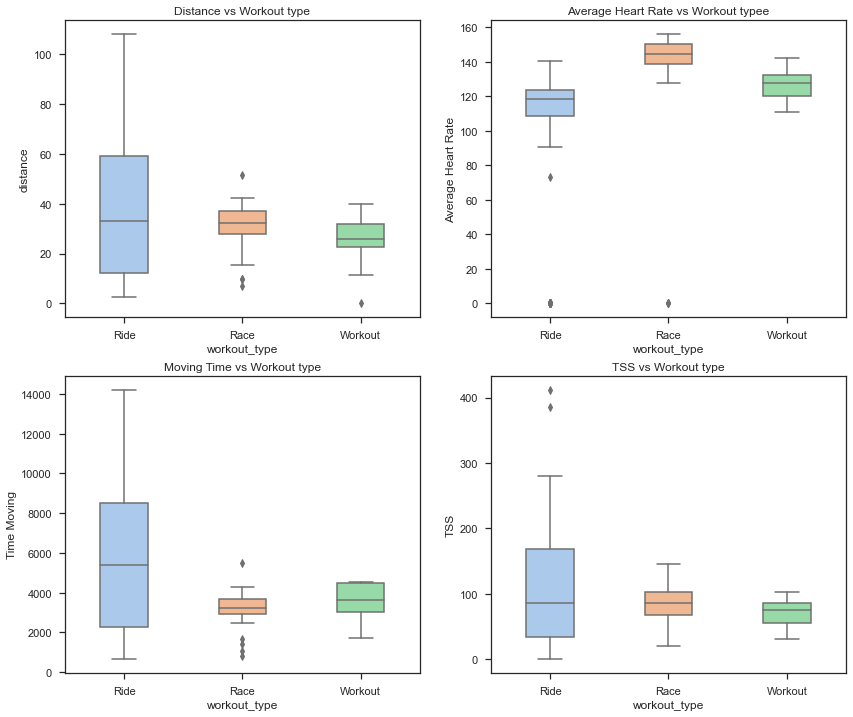

In [61]:
#Use histograms or box plots to visualise the different distributions of a variable for the three categories.
#boxplot
sns.set_theme(style="ticks", palette="pastel")
# Load the example tips dataset
tips = sns.load_dataset("tips")

f, axes = plt.subplots(2, 2, figsize = (14, 12))
sns.boxplot(x='workout_type', y='distance', data=strava_cheetah, width=0.4, ax=axes[0][0]).set_title('A. Distance vs Workout type')

sns.boxplot(x='workout_type', y='Average Heart Rate', data=strava_cheetah, width=0.4, ax=axes[0][1]).set_title('B. Average Heart Rate vs Workout type')
sns.boxplot(x='workout_type', y='Time Moving', data=strava_cheetah, width=0.4, ax=axes[1][0]).set_title('C. Moving Time vs Workout type')
sns.boxplot(x='workout_type', y='TSS', data=strava_cheetah, width=0.4, ax=axes[1][1]).set_title('D. TSS vs Workout type')

#### Analysis 3B: 
* A. Distance vs Workout type
* B. Average Heart Rate vs Workout type
* C. Moving Time vs Workout type
* D. TSS vs Workout type

In [63]:
#weather_data_2018.csv
weather2018 = pd.read_csv('data/weather_data_2018.csv', skipinitialspace=True)
weather2018


weather2018['Day'] = weather2018['Day'].apply(str)
weather2018['Day'] = weather2018['Day'].str.zfill(2)
weather2018['Month'] = weather2018['Month'].apply(str)
weather2018['Month'] = weather2018['Month'].str.zfill(2)
weather2018['Year'] = weather2018['Year'].apply(str)


weather2018['Date'] = (weather2018['Year'] + '-' + weather2018['Month'] + '-' + weather2018['Day'])
weather2018['Date'] = pd.to_datetime(weather2018.Date, format='%Y-%m-%d')

weather2018['Date']

0     2018-01-01
1     2018-01-02
2     2018-01-03
3     2018-01-04
4     2018-01-05
         ...    
360   2018-12-27
361   2018-12-28
362   2018-12-29
363   2018-12-30
364   2018-12-31
Name: Date, Length: 365, dtype: datetime64[ns]

In [64]:
#type(weather2018.index)

#Check data type
weather2018.dtypes

Product code                                           object
Bureau of Meteorology station number                    int64
Year                                                   object
Month                                                  object
Day                                                    object
Maximum temperature (Degree C)                        float64
Days of accumulation of maximum temperature           float64
Quality                                                object
Date                                           datetime64[ns]
dtype: object

In [65]:
#weather_data_2019.csv
weather2019 = pd.read_csv('data/weather_data_2019.csv', skipinitialspace=True)

weather2019['Day'] = weather2019['Day'].apply(str)
weather2019['Day'] = weather2019['Day'].str.zfill(2)
weather2019['Month'] = weather2019['Month'].apply(str)
weather2019['Month'] = weather2019['Month'].str.zfill(2)
weather2019['Year'] = weather2019['Year'].apply(str)


weather2019['Date'] = (weather2019['Year'] + '-' + weather2019['Month'] + '-' + weather2019['Day'])
weather2019['Date'] = pd.to_datetime(weather2019.Date, format='%Y-%m-%d')

weather2019


,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,Date
0,IDCJAC0010,66212,2019,01,01,34.0,1.0,Y,2019-01-01
1,IDCJAC0010,66212,2019,01,02,30.6,1.0,Y,2019-01-02
2,IDCJAC0010,66212,2019,01,03,28.9,1.0,Y,2019-01-03
3,IDCJAC0010,66212,2019,01,04,33.7,1.0,Y,2019-01-04
4,IDCJAC0010,66212,2019,01,05,39.3,1.0,Y,2019-01-05
...,...,...,...,...,...,...,...,...,...
360,IDCJAC0010,66212,2019,12,27,30.1,1.0,Y,2019-12-27
361,IDCJAC0010,66212,2019,12,28,33.8,1.0,Y,2019-12-28
362,IDCJAC0010,66212,2019,12,29,30.7,1.0,Y,2019-12-29
363,IDCJAC0010,66212,2019,12,30,33.2,1.0,Y,2019-12-30


In [66]:
#Select 2018
col = ['SC_Date', 'distance', 'Average Speed', 'workout_type']
result2018 = strava_cheetah[col]
result2018 = result2018[result2018.SC_Date <= '2018-12-31']

#strava_cheetah = strava_cheetah.drop(strava_cheetah.index[strava_cheetah.device_watts == False])
result2018

,SC_Date,distance,Average Speed,workout_type
2018-01-27 19:39:49+00:00,2018-01-27,7.6,26.0234,Ride
2018-01-27 20:01:32+00:00,2018-01-27,38.6,34.4380,Race
2018-02-05 21:06:42+00:00,2018-02-05,24.3,22.2417,Ride
2018-02-07 06:59:05+00:00,2018-02-07,47.1,20.7841,Ride
2018-02-09 19:18:03+00:00,2018-02-09,59.8,25.6585,Ride
...,...,...,...,...
2018-12-15 19:42:51+00:00,2018-12-15,65.5,23.1356,Ride
2018-12-17 19:17:30+00:00,2018-12-17,26.0,25.8649,Ride
2018-12-25 19:38:06+00:00,2018-12-25,69.2,22.2358,Ride
2018-12-28 19:24:18+00:00,2018-12-28,60.8,26.4935,Ride


In [67]:
#Select 2019
result2019 = strava_cheetah[col]
result2019 = result2019[result2019.SC_Date > '2018-12-31']

result2019

,SC_Date,distance,Average Speed,workout_type
2019-01-01 19:02:50+00:00,2019-01-01,72.6,22.8176,Ride
2019-01-03 05:59:11+00:00,2019-01-03,33.1,22.2007,Ride
2019-01-04 19:08:10+00:00,2019-01-04,68.0,24.5250,Ride
2019-01-08 19:56:34+00:00,2019-01-08,8.2,21.3307,Ride
2019-01-08 20:24:02+00:00,2019-01-08,9.7,21.1067,Ride
...,...,...,...,...
2019-07-19 20:22:49+00:00,2019-07-19,58.2,25.4524,Ride
2019-07-26 20:12:56+00:00,2019-07-26,59.6,25.5036,Ride
2019-07-27 20:42:59+00:00,2019-07-27,19.8,24.3316,Ride
2019-07-27 21:47:24+00:00,2019-07-27,29.1,34.8044,Race


In [69]:
#Inner Join strava and cheetah

result2018_w = pd.merge(left = result2018 , right = weather2018 ,
                 left_on = ['SC_Date'], right_on = ['Date'], how = 'left')

result2019_w = pd.merge(left = result2019 , right = weather2019 ,
                 left_on = ['SC_Date'], right_on = ['Date'], how = 'left')

drop_cols = ['Product code', 'Bureau of Meteorology station number', 'Year', 'Month', 'Day',
             'Days of accumulation of maximum temperature', 'Quality', 'Date']
result2018_w.drop(drop_cols, axis = 1, inplace = True)
result2019_w.drop(drop_cols, axis = 1, inplace = True)

In [70]:
result2018_w

,SC_Date,distance,Average Speed,workout_type,Maximum temperature (Degree C)
0,2018-01-27,7.6,26.0234,Ride,30.4
1,2018-01-27,38.6,34.4380,Race,30.4
2,2018-02-05,24.3,22.2417,Ride,27.4
3,2018-02-07,47.1,20.7841,Ride,28.1
4,2018-02-09,59.8,25.6585,Ride,31.9
...,...,...,...,...,...
99,2018-12-15,65.5,23.1356,Ride,29.4
100,2018-12-17,26.0,25.8649,Ride,31.0
101,2018-12-25,69.2,22.2358,Ride,31.5
102,2018-12-28,60.8,26.4935,Ride,35.3


In [71]:
result2019_w

,SC_Date,distance,Average Speed,workout_type,Maximum temperature (Degree C)
0,2019-01-01,72.6,22.8176,Ride,34.0
1,2019-01-03,33.1,22.2007,Ride,28.9
2,2019-01-04,68.0,24.5250,Ride,33.7
3,2019-01-08,8.2,21.3307,Ride,31.0
4,2019-01-08,9.7,21.1067,Ride,31.0
...,...,...,...,...,...
100,2019-07-19,58.2,25.4524,Ride,20.5
101,2019-07-26,59.6,25.5036,Ride,19.0
102,2019-07-27,19.8,24.3316,Ride,20.3
103,2019-07-27,29.1,34.8044,Race,20.3


In [72]:
#Append Data 2018 x 2019

result_w = pd.concat([result2018_w, result2019_w] , axis=0)

result_w

,SC_Date,distance,Average Speed,workout_type,Maximum temperature (Degree C)
0,2018-01-27,7.6,26.0234,Ride,30.4
1,2018-01-27,38.6,34.4380,Race,30.4
2,2018-02-05,24.3,22.2417,Ride,27.4
3,2018-02-07,47.1,20.7841,Ride,28.1
4,2018-02-09,59.8,25.6585,Ride,31.9
...,...,...,...,...,...
100,2019-07-19,58.2,25.4524,Ride,20.5
101,2019-07-26,59.6,25.5036,Ride,19.0
102,2019-07-27,19.8,24.3316,Ride,20.3
103,2019-07-27,29.1,34.8044,Race,20.3


Text(0.5, 1.0, 'Average Speed vs Maximum temperature (Degree C)')

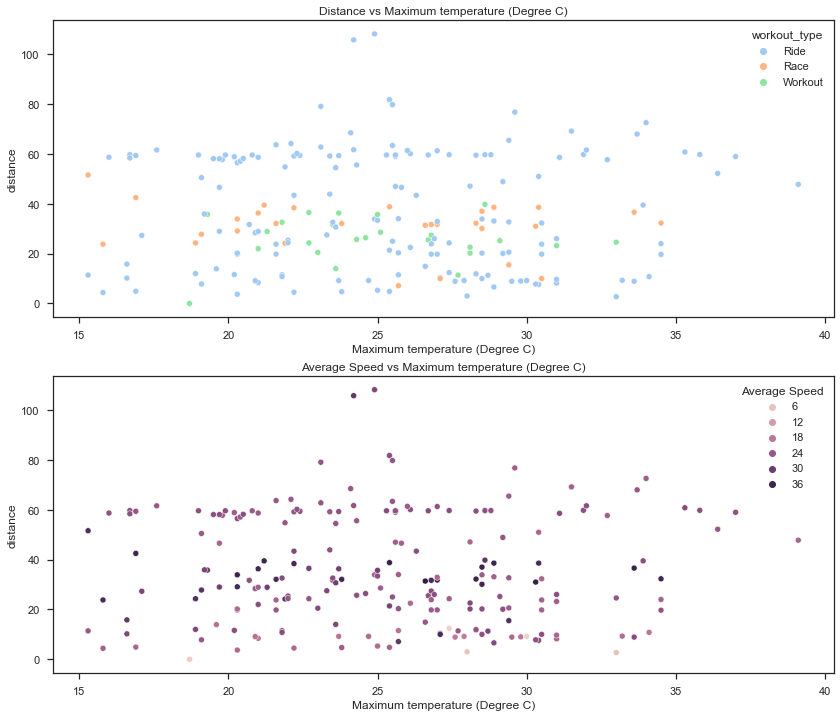

In [75]:
#distance vs Time Moving (on the three categories: Race, Workout and Ride)
f, axes = plt.subplots(2, figsize = (14, 12))
sns.scatterplot(x='Maximum temperature (Degree C)', y = 'distance', hue='workout_type', data = result_w, ax=axes[0]).set_title('Distance vs Maximum temperature (Degree C)')
sns.scatterplot(x='Maximum temperature (Degree C)', y = 'distance', hue='Average Speed', data = result_w, ax=axes[1]).set_title('Average Speed vs Maximum temperature (Degree C)')

## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

In [118]:
SC_corr.corr().loc[:'distance', 'kudos':]

,kudos,elevation_f
distance,0.854488,0.975115


<AxesSubplot:xlabel='distance', ylabel='kudos'>

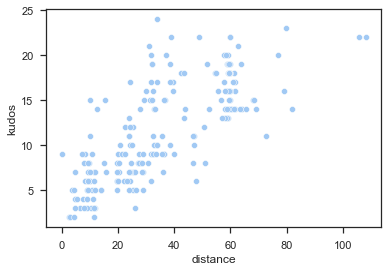

In [101]:
#kudos

sns.scatterplot(x='distance', y = 'kudos', data = result)


<AxesSubplot:xlabel='workout_type', ylabel='kudos'>

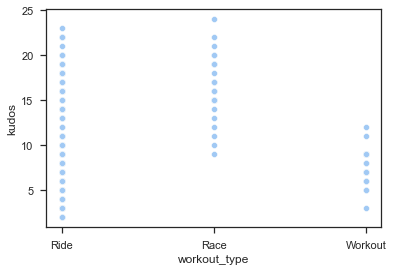

In [100]:
sns.scatterplot(x='workout_type', y = 'kudos', data = result)

<AxesSubplot:xlabel='distance', ylabel='kudos'>

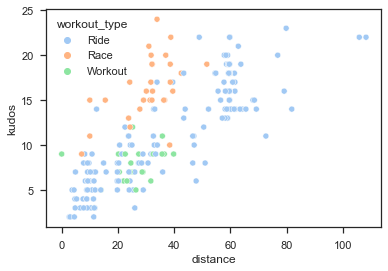

In [97]:
sns.scatterplot(x='distance', y = 'kudos', hue='workout_type', data = result)


<AxesSubplot:xlabel='TSS', ylabel='kudos'>

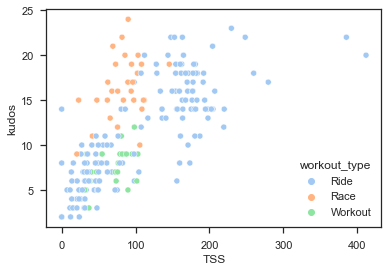

In [99]:
sns.scatterplot(x='TSS', y = 'kudos', hue='workout_type', data = result)

## Required Analysis

1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
* Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain
* We want to explore the differences between the three categories: `Race`, `Workout` and `Ride`.
    * Use scatter plots with different colours for each category to explore how these categories differ.  
    * Use histograms or box plots to visualise the different distributions of a variable for the three categories.
    * In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).
* We want to explore relationship between `rides` and `weather`. In order to carry out this analysis, you need `weather` data from relevant source. For your convenience, we have downloaded temperature data from [Bureau of Meterology](http://www.bom.gov.au/). You can find temperature under `Maximum temperature (Degree C)` column which represents maximum temperature for the day. Under the `data` directory, you get `weather_data_2018.csv` and `weather_data_2019.csv` files from where you can read daily temperatures. In order to get temperature for a day so that you can use in your combined dataframe (joining Strava and Cheetah datasets), you need to make `date` column consistent in both dataframes. 
    * Make `date` column consistent across both `weather` and `rides` datasets so that you can get `Maximum temperature` for the day of the ride. 
    * Can you find any relationship between distance travelled per ride and the temperature?
    * Can you find any relatioship between Average speed of ride and the temperature?


## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

* Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

* Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

Hint: to generate these summary plots you need to use the [timeseries/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) in Pandas to generate a new data frame containing the required data.  

__Note:__ once you have completed these steps you can remove this cell.  Use the text as a starting point for the documentation of your workflow and discussion of results.
